# Projeto - Fatores de Influência para uma Campanha de Marketing

Uma empresa varejista deseja fazer um levantamento dos principais fatores que levam seus clientes a aceitar suas campanhas de marketing para otimizar os esforços e custos de uma campanha planejada.

Objetivo: Indicar o perfil dos clientes mais propensos a aceitar as campanhas de marketing para melhorar a eficiência das campanhas

## Dataset

Origem (Kaggle): https://www.kaggle.com/datasets/ahsan81/superstore-marketing-campaign-dataset

Colunas:

* Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwisence the last purchase

* ID - Unique ID of each customer

* Year_Birth - Age of the customer

* Complain - 1 if the customer complained in the last 2 years

* Dt_Customer - date of customer's enrollment with the company

* Education - customer's level of education

* Marital - customer's marital status

* Kidhome - number of small children in customer's household

* Teenhome - number of teenagers in customer's household

* Income - customer's yearly household income

* MntFishProducts - the amount spent on fish products in the last 2 years

* MntMeatProducts - the amount spent on meat products in the last 2 years

* MntFruits - the amount spent on fruits products in the last 2 years

* MntSweetProducts - amount spent on sweet products in the last 2 years

* MntWines - the amount spent on wine products in the last 2 years

* MntGoldProds - the amount spent on gold products in the last 2 years

* NumDealsPurchases - number of purchases made with discount

* NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)

* NumStorePurchases - number of purchases made directly in stores

* NumWebPurchases - number of purchases made through the company's website

* NumWebVisitsMonth - number of visits to company's website in the last month

* Recency - number of days since the last purchase

## Preparação do ambiente

In [1]:
import sklearn
import scipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

## Carregamento dos dados

In [2]:
#Carrega o dataset
df = pd.read_csv("superstore_data.csv")

In [3]:
#Shape
df.shape

(2240, 22)

In [4]:
# Amostra dos dados
df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,11,0,34,2,3,1,2,7,1,0


In [5]:
#Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

É preciso ajustar os tipos de dados em algumas colunas e ajustar os nomes das colunas para prevenir problemas ao usá-las

## Limpeza e pré-processamento dos dados

In [6]:
# Remoção do espaço extra nos títulos das colunas
df.columns = df.columns.str.replace(' ', '') 

In [7]:
# A coluna de data está como tipo object. Vamos converter para o tipo datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer']) 

In [8]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Id                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [9]:
# Amostra dos dados
df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,2014-11-05,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,2014-08-04,0,6,...,11,0,34,2,3,1,2,7,1,0


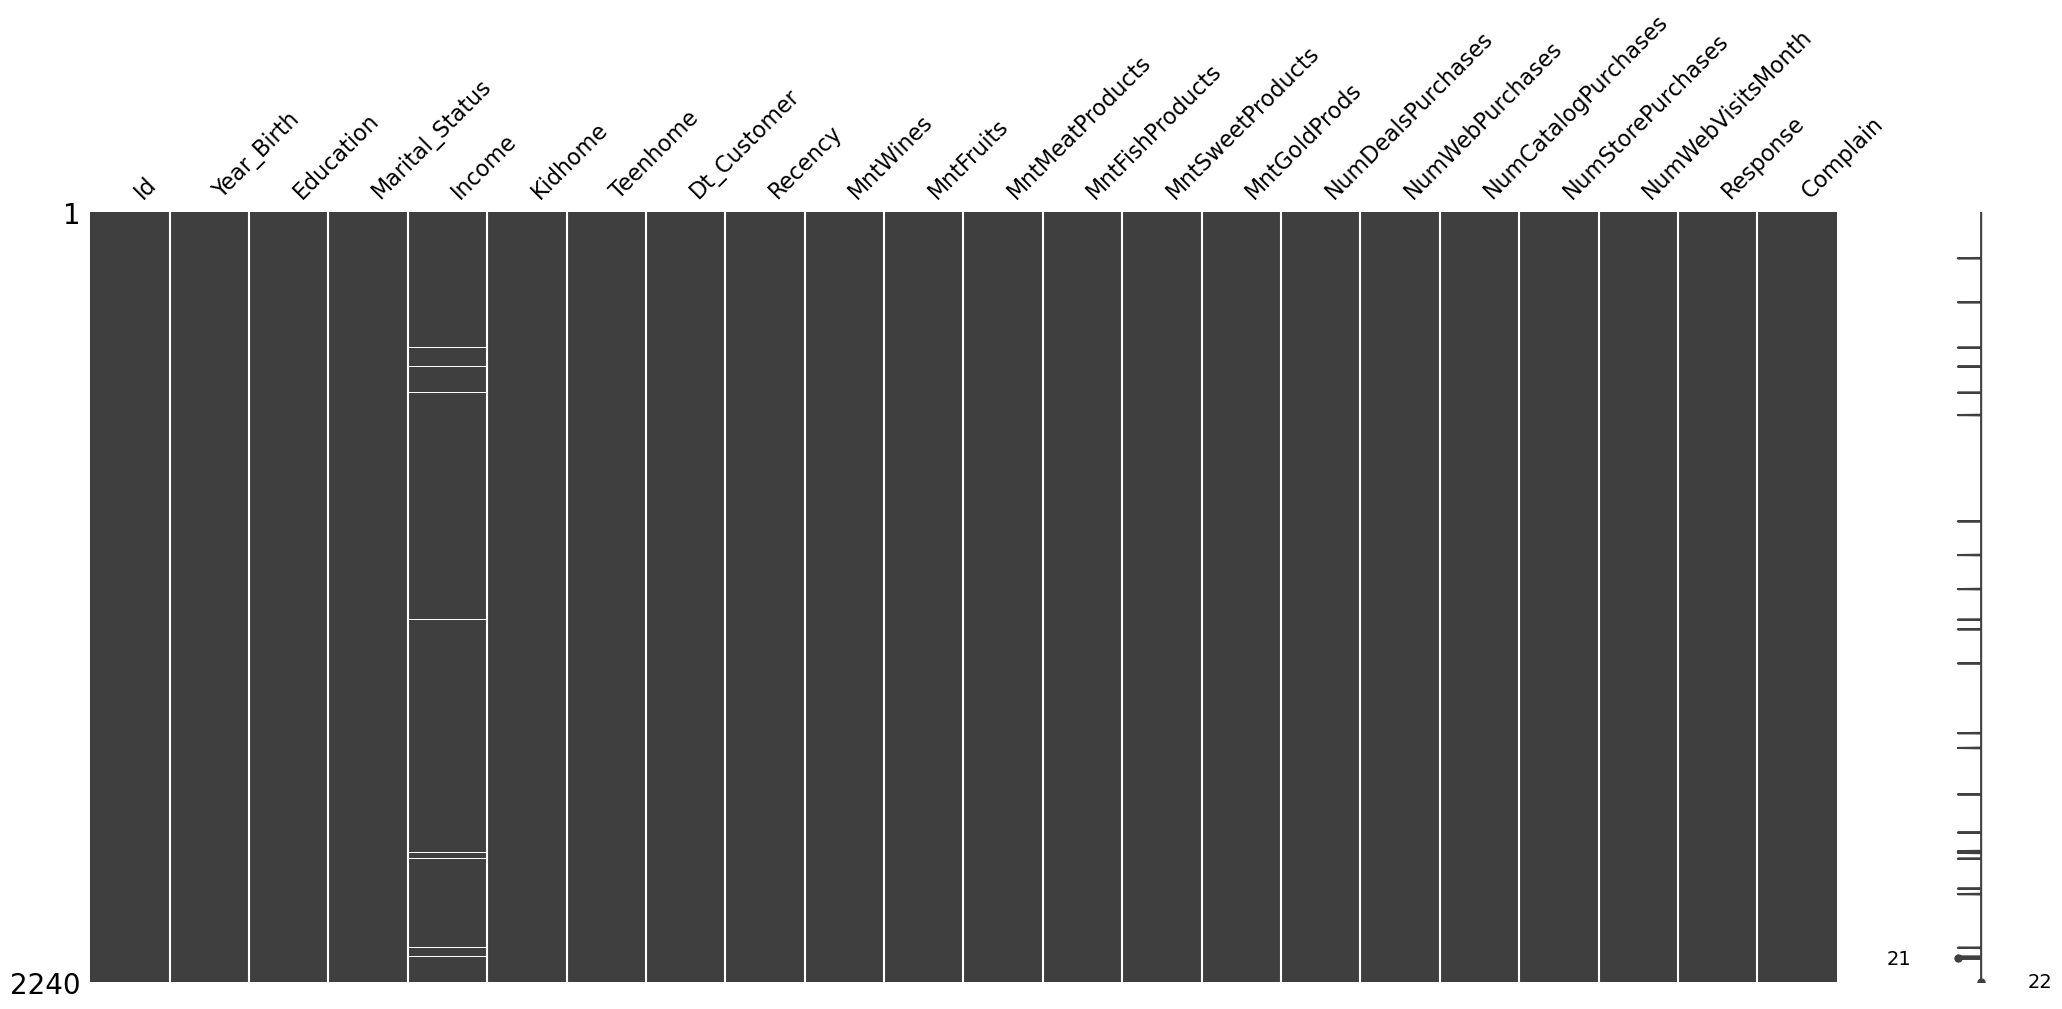

In [10]:
# Matriz de valores ausentes
msno.matrix(df)
plt.show()

In [11]:
# Soma de valores ausentes
valores_ausentes = df.isnull().sum().sort_values(ascending = False)
valores_ausentes

Income                 24
Id                      0
MntFishProducts         0
Response                0
NumWebVisitsMonth       0
NumStorePurchases       0
NumCatalogPurchases     0
NumWebPurchases         0
NumDealsPurchases       0
MntGoldProds            0
MntSweetProducts        0
MntMeatProducts         0
Year_Birth              0
MntFruits               0
MntWines                0
Recency                 0
Dt_Customer             0
Teenhome                0
Kidhome                 0
Marital_Status          0
Education               0
Complain                0
dtype: int64

In [12]:
# Filtramos pelas que são diferentes de zero
print(valores_ausentes.loc[valores_ausentes != 0])

Income    24
dtype: int64


Para tratar os valores ausentes primeiro devemos checar se há outliers na variável, o que ajudará a tomar a decisão ideal de tratamento dos valores ausentes.

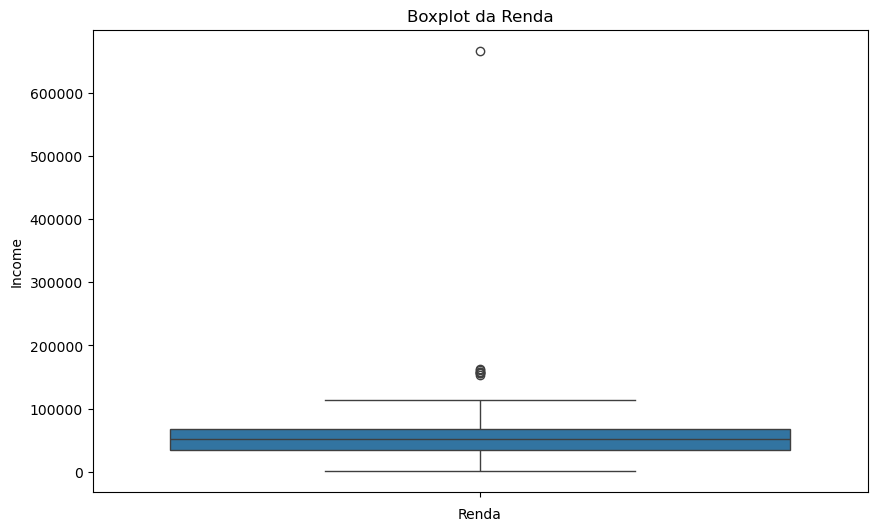

In [13]:
# Vamos usar um boxplot para visualizar se há outliers na coluna 'Renda'
plt.figure(figsize = (10, 6))
sns.boxplot(df['Income'])
plt.title('Boxplot da Renda')
plt.xlabel('Renda')
plt.show()

Parece haver outliers. Será usado o cálculo estatístico para identificá-los.

In [14]:
# Cálculo do IQR para a Renda
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1

# Defição dos limites para considerar um ponto como outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificação dos outliers
outliers = df[(df['Income'] < lower_bound) | (df['Income'] > upper_bound)]
outliers

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
325,4931,1977,Graduation,Together,157146.0,0,0,2013-04-29,13,1,...,2,1,1,0,0,28,0,1,0,0
497,1501,1982,PhD,Married,160803.0,0,0,2012-04-08,21,55,...,17,3,4,15,0,28,1,0,0,0
527,9432,1977,Graduation,Together,666666.0,1,0,2013-02-06,23,9,...,8,1,12,4,3,1,3,6,0,0
731,1503,1976,PhD,Together,162397.0,1,1,2013-03-06,31,85,...,2,1,2,0,0,0,1,1,0,0
853,5336,1971,Master,Together,157733.0,1,0,2013-04-06,37,39,...,2,0,8,0,1,0,1,1,0,0
1826,5555,1975,Graduation,Divorced,153924.0,0,0,2014-07-02,81,1,...,1,1,1,0,0,0,0,0,0,0
1925,11181,1949,PhD,Married,156924.0,0,0,2013-08-29,85,2,...,1,1,1,0,0,0,0,0,0,0
2204,8475,1973,PhD,Married,157243.0,0,1,2014-01-03,98,20,...,1,2,1,15,0,22,0,0,0,0


Será verificada a distribuição da variável

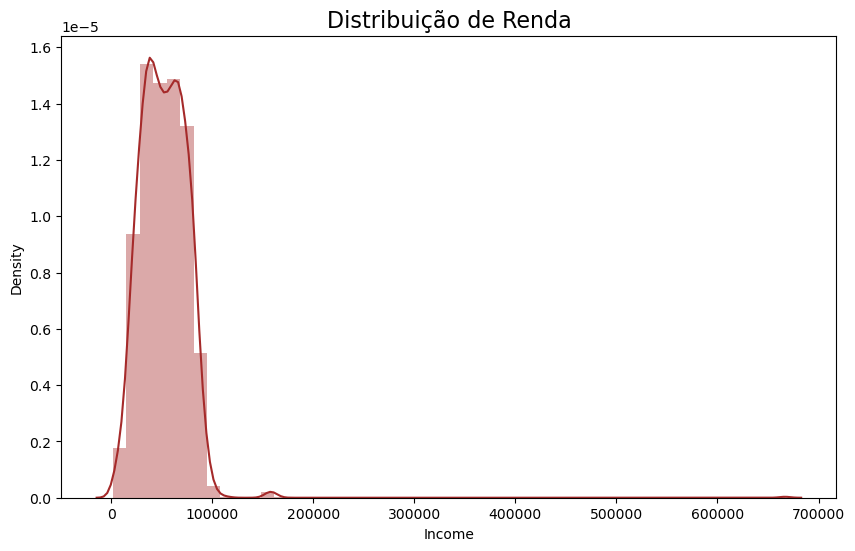

In [15]:
# Definição do tamanho da figura
plt.figure(figsize = (10, 6)) 

# Criação do gráfico de distribuição
sns.distplot(df['Income'], color = 'brown')  

# Definição do título
plt.title('Distribuição de Renda', size = 16)  

# Exibição do gráfico
plt.show()

Os outliers serão removidos por serem poucos registros e para não impactarem a imputação dos valores ausentes

In [16]:
# Remoção dos outliers do dataset
df = df[(df['Income'] >= lower_bound) & (df['Income'] <= upper_bound)]

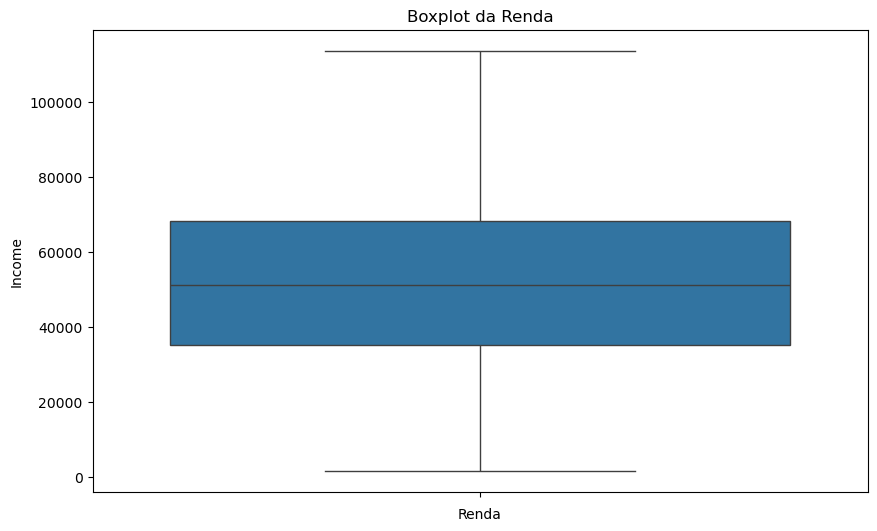

In [17]:
# Visualização dos dados na coluna 'Renda' após a remoção
plt.figure(figsize = (10, 6))
sns.boxplot(df['Income'])
plt.title('Boxplot da Renda')
plt.xlabel('Renda')
plt.show()

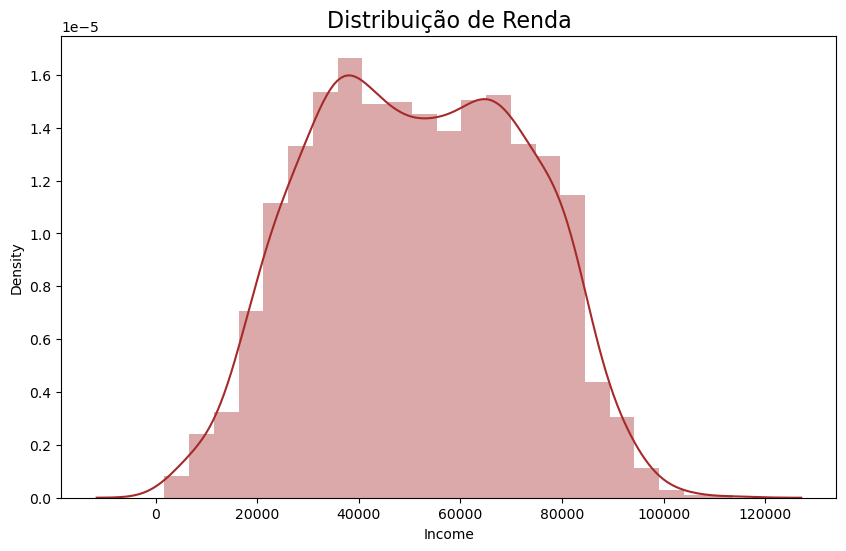

In [18]:
#Visualização da distribuição da Renda após a remoção dos outliers

# Definindo o tamanho da figura
plt.figure(figsize = (10, 6)) 

# Criando o gráfico de distribuição
sns.distplot(df['Income'], color = 'brown')  

# Definindo o título
plt.title('Distribuição de Renda', size = 16)  

# Exibindo o gráfico
plt.show()

### Tratamento dos valores ausentes

In [19]:
# Para inputação dos valores ausentes será utilizado o algortimo K-Nearest Neighbors, 
# que precisa de dados normalizados como input

# Normalização dos dados antes de aplicar o KNNImputer
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df[['Income']])

# Criação do KNNImputer com 5 vizinhos
imputer = KNNImputer(n_neighbors=5)

# Imputação dos valores ausentes com o imputer
data_imputed = imputer.fit_transform(data_scaled)

# Conversão de volta para o formato original 
df['Income'] = scaler.inverse_transform(data_imputed)

print('Total de Valores Ausentes:', df.isnull().sum().sum())

Total de Valores Ausentes: 0


### Verificação de Outliers na Variável Ano de Nascimento

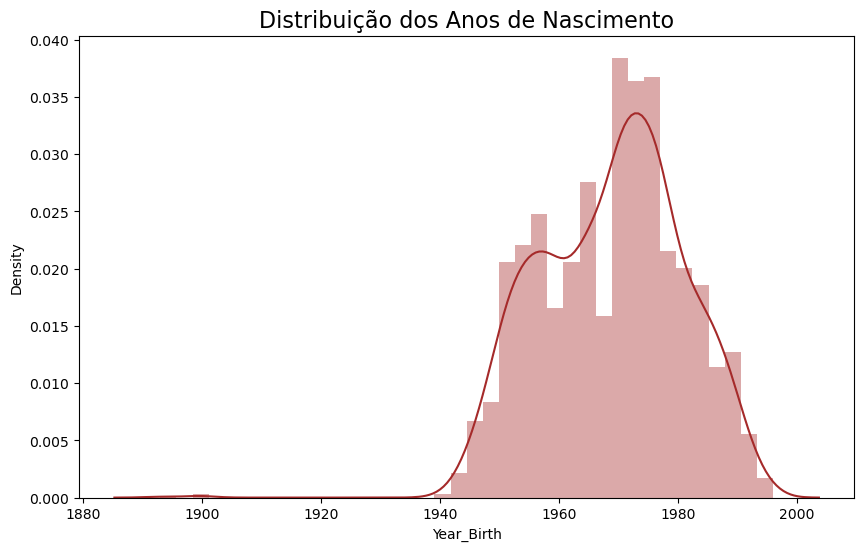

In [20]:
# Definição do tamanho da figura
plt.figure(figsize = (10, 6)) 

# Criação do gráfico de distribuição
sns.distplot(df['Year_Birth'], color = 'brown')  

# Definição do título
plt.title('Distribuição dos Anos de Nascimento', size = 16)  

# Exibição do gráfico
plt.show()

In [21]:
# Cálculo do IQR para a Ano de Nascimento
Q1_y = df['Year_Birth'].quantile(0.25)
Q3_y = df['Year_Birth'].quantile(0.75)
IQR_y = Q3_y - Q1_y

# Defição dos limites para considerar um ponto como outlier
lower_bound_y = Q1_y - 1.5 * IQR_y
upper_bound_y = Q3_y + 1.5 * IQR_y

# Identificação dos outliers
outliers_y = df[(df['Year_Birth'] < lower_bound_y) | (df['Year_Birth'] > upper_bound_y)]
outliers_y

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
513,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,...,7,0,2,1,1,0,2,4,0,0
827,1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,...,104,64,224,1,4,6,4,1,0,0
2233,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,...,7,4,25,1,2,1,2,5,0,1


Os dados com outliers no Ano de Nascimento também serão removidos por serem somente 3 registros

In [22]:
# Remoção dos outliers do dataset
df = df[(df['Year_Birth'] >= lower_bound_y) & (df['Year_Birth'] <= upper_bound_y)]

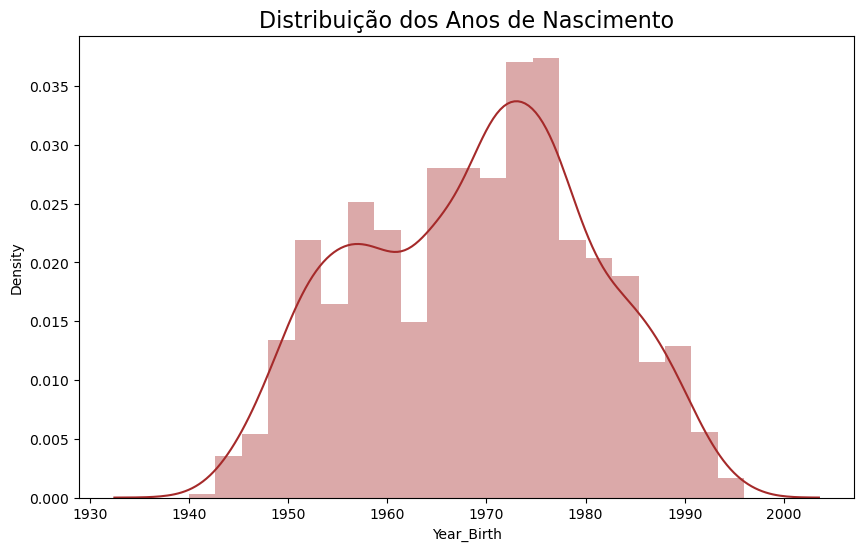

In [23]:
# Definição do tamanho da figura
plt.figure(figsize = (10, 6)) 

# Criação do gráfico de distribuição
sns.distplot(df['Year_Birth'], color = 'brown')  

# Definição do título
plt.title('Distribuição dos Anos de Nascimento', size = 16)  

# Exibição do gráfico
plt.show()

## Análise Exploratória e Engenharia de Atributos

In [24]:
# Colunas
df.columns

Index(['Id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Complain'],
      dtype='object')

In [25]:
# Drop (em memória) das colunas categóricas para criar o box plot das colunas quantitativas
data_boxplot = df.drop(columns = ['Id',
                                      'Education',
                                      'Marital_Status',
                                      'Dt_Customer',
                                      'Response', 
                                      'Complain'])

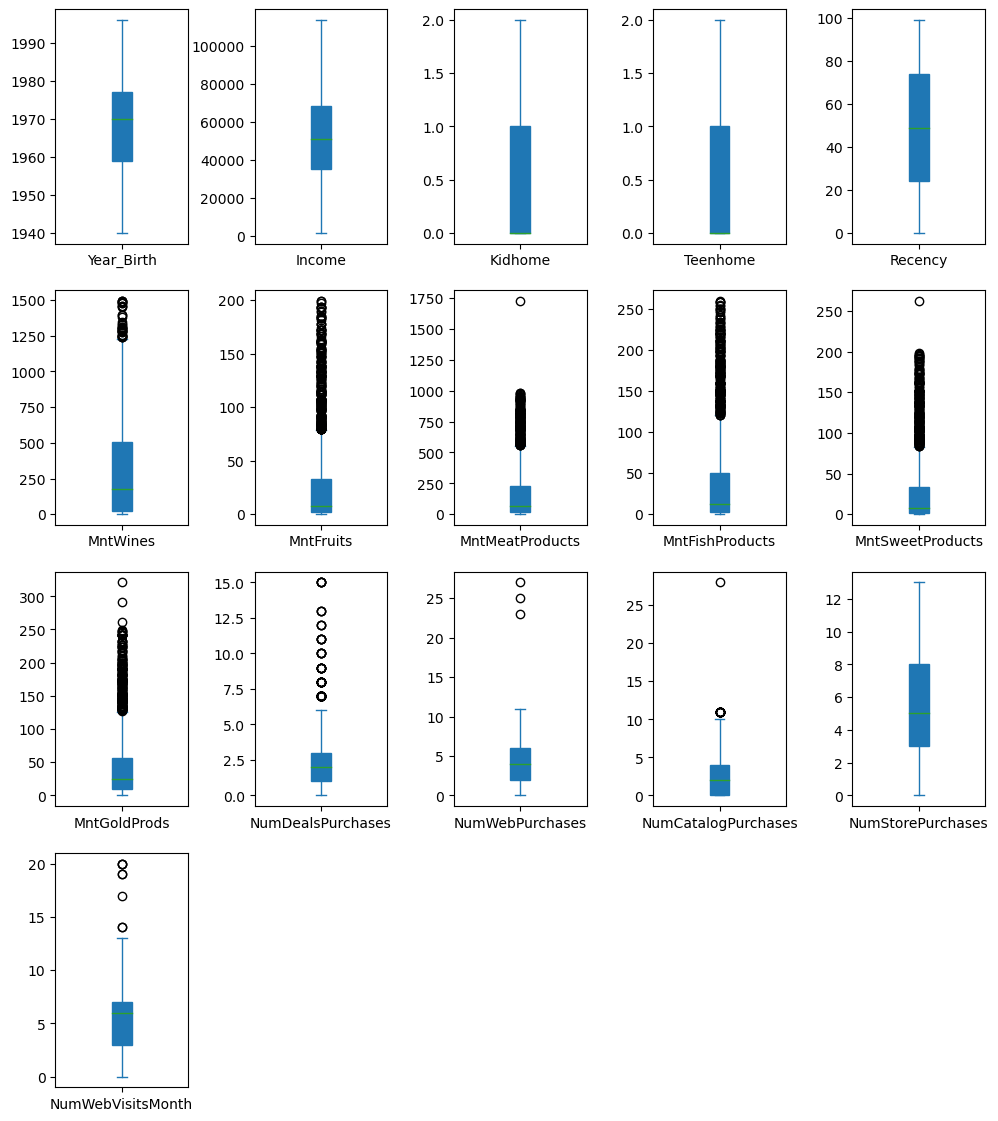

In [26]:
# Plot
data_boxplot.plot(subplots = True, layout = (4,5), kind = 'box', figsize = (12,14), patch_artist = True)
plt.subplots_adjust(wspace=0.5);

Visando a obtenção de informações mais úteis, será feita um engenharia de atributos para algumas variáveis que serão combinadas e ajustadas

In [27]:
# Criação de uma nova coluna com a idade de cada cliente (ano atual - ano de nascimento)
ano_atual = datetime.now().year
df['Age'] = ano_atual - df['Year_Birth']

In [28]:
# Criação de uma coluna com o número de dias como cliente desde a data de cadastro
df['Days_as_Customer'] = df['Dt_Customer'].max() - df['Dt_Customer']

In [29]:
# Remoção da palavra "days" ao final do valor de cada linha da coluna Days_as_Customer
df['Days_as_Customer'] = df['Days_as_Customer'].astype(str).str.replace(' days', '')

In [30]:
# Ajuste do tipo de dado da variável Dias_Como_Cliente
df['Days_as_Customer'] = pd.to_numeric(df['Days_as_Customer'], downcast = 'integer')

In [31]:
# Cria uma variável com o Total de Compras realizadas nos 4 diferentes canais
df['TotalPurchases'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

In [32]:
# Ajuste do tipo de dado em uma nova coluna
df['Children'] = df['Kidhome']+df['Teenhome']
df['Children'] = df['Children'].apply(lambda x: 'Yes' if x > 0 else 'No')

In [33]:
# Cria a variável Gasto_Total (TotalMnt) com o somatório de todas as colunas que começam com o nome Mnt
df['TotalMnt'] = df.filter(like = 'Mnt').sum(axis=1)

In [34]:
# Drop nas variáveis que não serão usadas
df.drop(['Year_Birth', 'Dt_Customer', 'Kidhome', 'Teenhome'], axis = 1, inplace = True)

In [35]:
df.describe()

,Id,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age,Days_as_Customer,TotalPurchases,TotalMnt
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000
mean,5585.439456,51622.094785,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,2.318367,4.100680,2.645351,5.823583,5.336961,0.15102,0.009070,55.095692,512.062585,14.887982,606.821769
std,3247.546423,20713.063826,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,1.886107,2.737424,2.798647,3.241796,2.413535,0.35815,0.094827,11.705801,232.528808,7.615277,601.675284
min,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,28.000000,0.000000,0.000000,5.000000
25%,2815.000000,35196.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.00000,0.000000,47.000000,340.000000,8.000000,69.000000
50%,5455.000000,51287.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.00000,0.000000,54.000000,513.000000,15.000000,397.000000
75%,8418.000000,68281.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.00000,0.000000,65.000000,686.000000,21.000000,1047.000000
max,11191.000000,113734.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.00000,1.000000,84.000000,1063.000000,43.000000,2525.000000


## Análise Exploratória

### Distribuição das variáveis

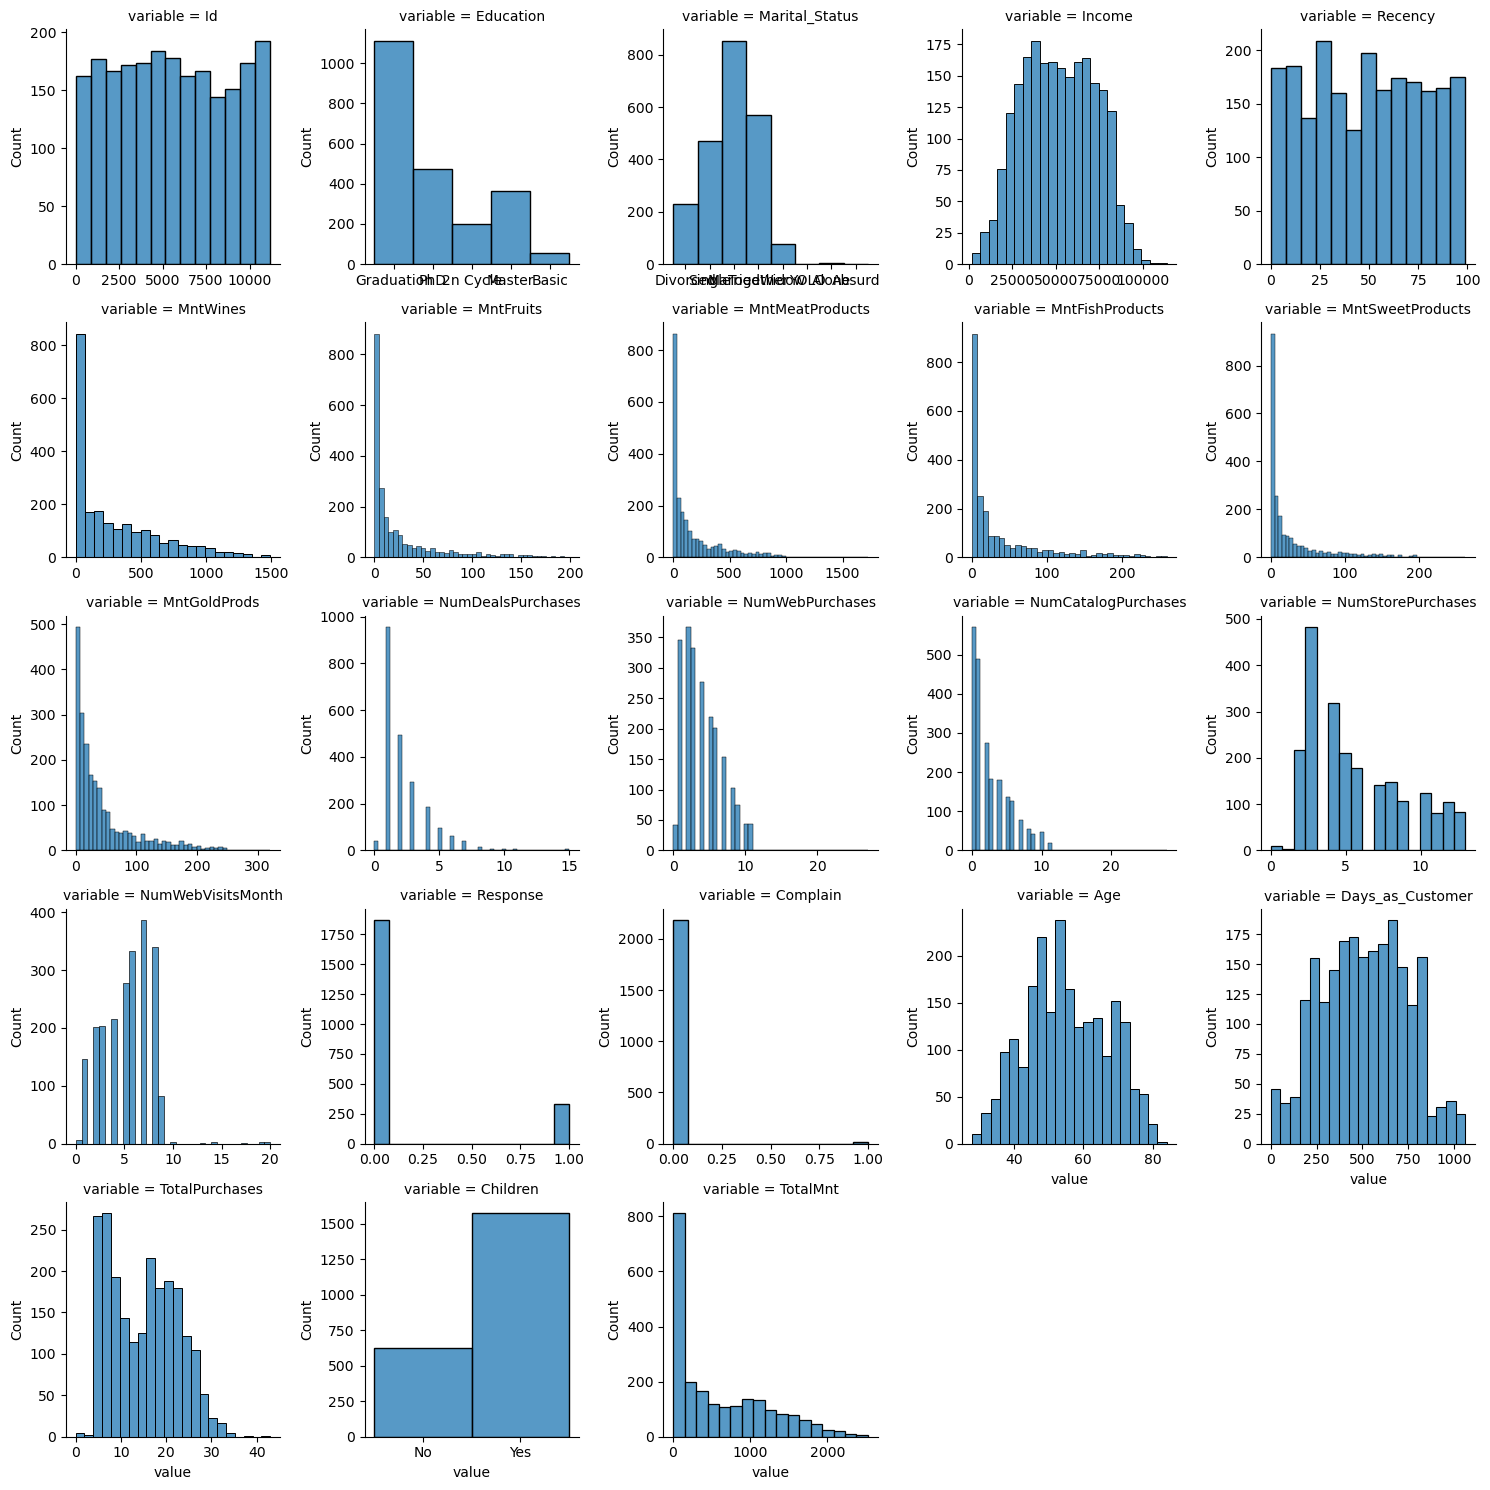

In [36]:
# Distribuição das Variáveis
hist = pd.melt(df, value_vars = df )
hist = sns.FacetGrid (hist, col = 'variable', col_wrap = 5, sharex = False, sharey = False)
hist.map(sns.histplot, 'value')

### Proporção de clientes que aceitaram a campanha

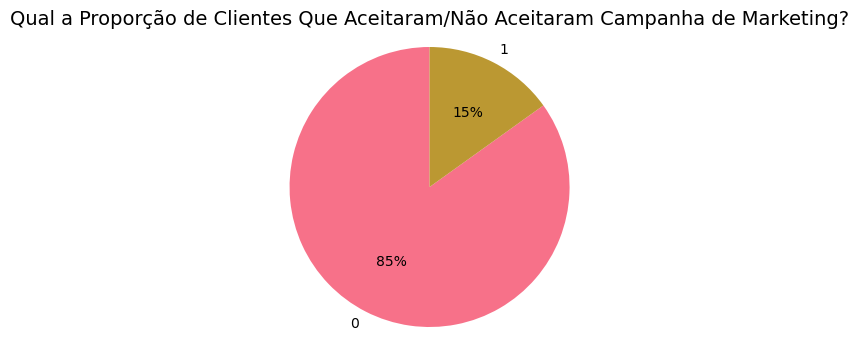

In [37]:
# Plot

# Tamanho da figura
fig, ax = plt.subplots(figsize = (6, 4))

# Conta as ocorrências de cada resposta
counts = df['Response'].value_counts()
labels = counts.index.tolist()

# Paleta de cores
colors = sns.color_palette('husl')

# Pie chart
ax.pie(counts, labels = labels, colors = colors, autopct = '%.0f%%', startangle = 90)

# Título
ax.set_title('Qual a Proporção de Clientes Que Aceitaram/Não Aceitaram Campanha de Marketing?', fontsize = 14)

# Mantém os eixos iguais
ax.axis('equal')

# Display 
plt.show()

Somente 15% dos clientes aceitaram a campanha

### A Idade Tem Influência nas Decisões de Gastos dos Clientes?

In [38]:
# Filtra as colunas categóricas e calcula a correlação das colunas quantitativas
df_corr = df.drop(['Id',
                           'Education',
                           'Marital_Status',
                           'Children', 
                           'Response', 
                           'Complain'], axis = 1).corr()

In [39]:
column_corr = df_corr.loc['Age']

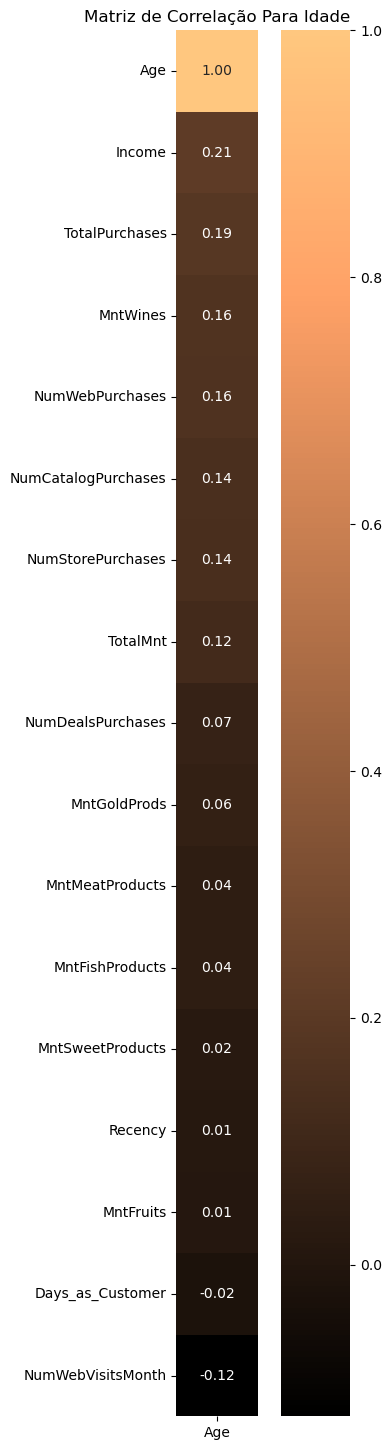

In [40]:
# Plot
plt.figure(figsize = (6, 18))
sns.heatmap(pd.DataFrame(column_corr.sort_values(ascending = False)), 
            annot = True, 
            cmap = 'copper', 
            cbar = True,
            square = True,
            fmt = '.2f')
plt.title('Matriz de Correlação Para Idade')
plt.show()

A correlação entre idade e total de gastos é relativamente alta em relação às outras variáveis, mas não é significativa

## Qual a Relação Entre Idade e Resposta às Campanhas de Marketing?

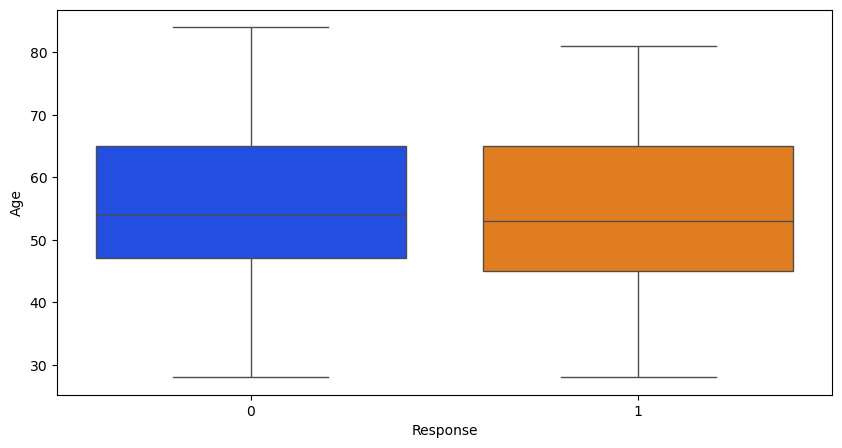

In [41]:
# Plot
plt.figure(figsize = (10,5))
sns.boxplot(x = 'Response', y = 'Age', data = df, palette = 'bright');

A idade não parece influenciar significativamente a aceitação da campanha

### Qual a Relação Entre Gasto Total e Resposta às Campanhas de Marketing?


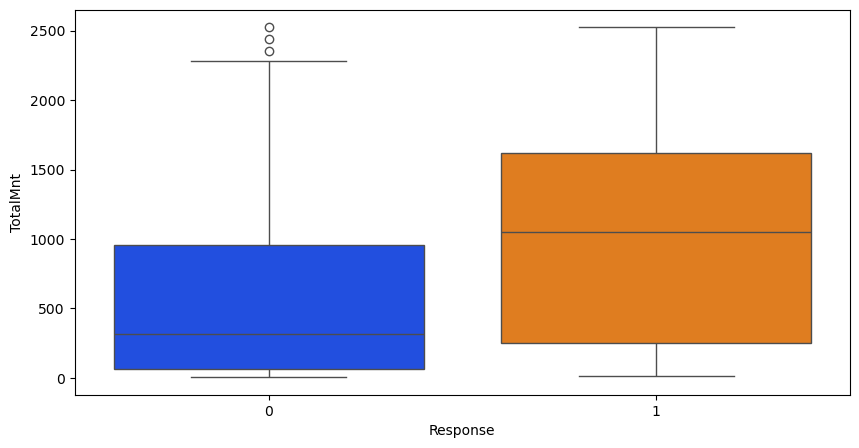

In [42]:
# Plot
plt.figure(figsize = (10,5))
sns.boxplot(x = 'Response', y = 'TotalMnt', data = df, palette = 'bright');

Quem gastou mais teve maior aceitação à campanha, apesar de os maiores valores de gastos estarem presentes nos dois grupos

### Em Qual Categoria de Produto os Clientes Têm Maior Gasto?

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2205 entries, 0 to 2239
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2205 non-null   int64  
 1   Education            2205 non-null   object 
 2   Marital_Status       2205 non-null   object 
 3   Income               2205 non-null   float64
 4   Recency              2205 non-null   int64  
 5   MntWines             2205 non-null   int64  
 6   MntFruits            2205 non-null   int64  
 7   MntMeatProducts      2205 non-null   int64  
 8   MntFishProducts      2205 non-null   int64  
 9   MntSweetProducts     2205 non-null   int64  
 10  MntGoldProds         2205 non-null   int64  
 11  NumDealsPurchases    2205 non-null   int64  
 12  NumWebPurchases      2205 non-null   int64  
 13  NumCatalogPurchases  2205 non-null   int64  
 14  NumStorePurchases    2205 non-null   int64  
 15  NumWebVisitsMonth    2205 non-null   int64 

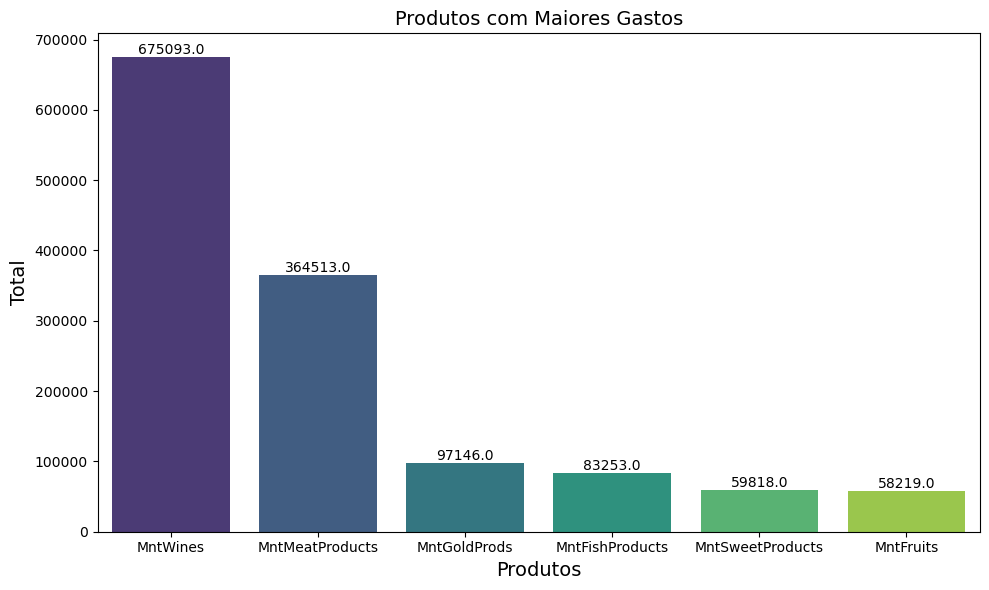

In [44]:
# Categorias de produtos
produtos = ['MntWines', 
            'MntFruits',
            'MntMeatProducts', 
            'MntFishProducts',
            'MntSweetProducts',
            'MntGoldProds']

# Cria o dataframe com os totais
df_produtos = pd.DataFrame(df[produtos].sum(), columns = ['Sum']).reset_index()

# Plot
plt.figure(figsize = (10, 6))
ax = sns.barplot(x = 'index', 
                 y = 'Sum', 
                 data = df_produtos.sort_values('Sum', ascending = False), 
                 palette = 'viridis')

# Labels
plt.xlabel('Produtos', size = 14)
plt.ylabel('Total', size = 14)
plt.title('Produtos com Maiores Gastos', size = 14)

# Inclui os valores no gráfico
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height()), ha = 'center', va = 'bottom')

# Display 
plt.tight_layout()
plt.show()

### Qual a Relação Entre Gasto com Vinho e Resposta às Campanhas de Marketing?

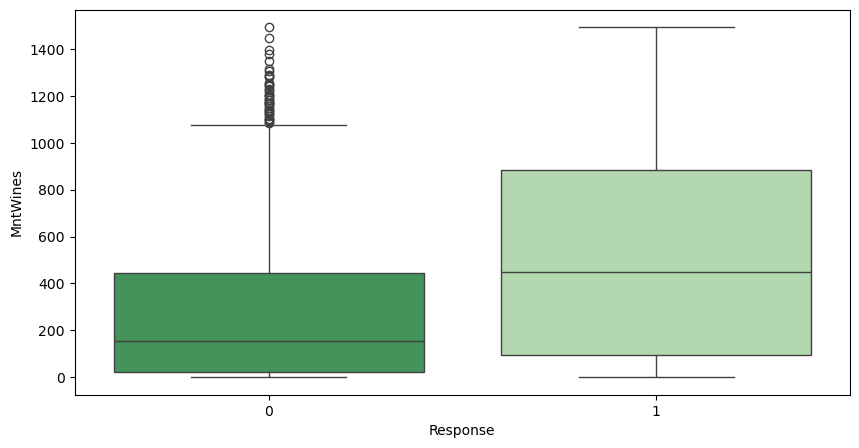

In [45]:
plt.figure(figsize = (10,5))
sns.boxplot(x = 'Response', y = 'MntWines', data = df, palette = 'Greens_r');

Quem gastou mais em vinhos teve maior aceitação à campanha, apesar de os maiores valores de gastos estarem presentes nos dois grupos

### Qual a Relação Entre Renda e Resposta às Campanhas de Marketing?

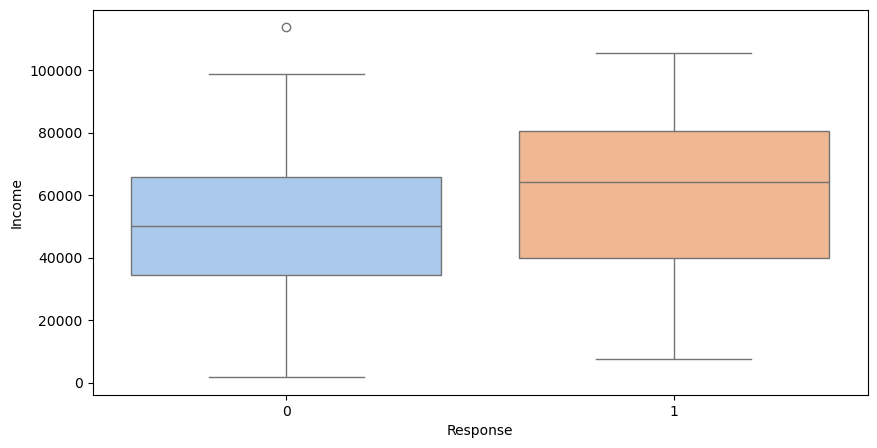

In [46]:
# Plot
plt.figure(figsize = (10,5))
sns.boxplot(x = 'Response', y = 'Income', data = df, palette = 'pastel');

Quem ganha mais teve maior aceitação à campanha, apesar de não ser uma diferença tão significativa

### Qual a Relação Entre Renda e Gasto Total?

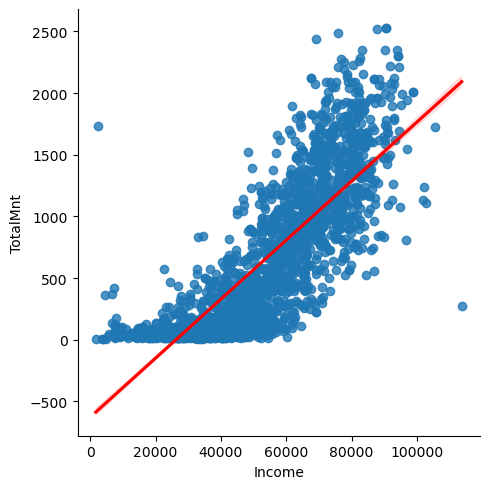

In [47]:
# Plot
sns.lmplot(x = 'Income', y = 'TotalMnt', data = df, palette = 'blue', line_kws = {'color': 'red'})

Há uma forte tendência de aumentar os gastos totais com o aumento da renda do cliente

### Quais Fatores São Mais Importantes Para Explicar a Decisão do Cliente em Aceitar ou Não a Campanha?

In [48]:
df.head()

,Id,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age,Days_as_Customer,TotalPurchases,Children,TotalMnt
0,1826,Graduation,Divorced,84835.0,0,189,104,379,111,189,...,4,6,1,1,0,54,173,15,No,1190
1,1,Graduation,Single,57091.0,0,464,5,64,7,0,...,3,7,5,1,0,63,174,18,No,577
2,10476,Graduation,Married,67267.0,0,134,11,59,15,2,...,2,5,2,0,0,66,207,11,Yes,251
3,1386,Graduation,Together,32474.0,0,10,0,1,0,0,...,0,2,7,0,0,57,31,4,Yes,11
4,5371,Graduation,Single,21474.0,0,6,16,24,11,0,...,1,2,7,1,0,35,124,8,Yes,91


In [49]:
# Converte as variáveis do tipo texto em representação numérica usando One-Hot Encoding
df_imp = pd.get_dummies(df, columns = ['Education', 'Marital_Status'])

In [50]:
df_imp.columns

Index(['Id', 'Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Response', 'Complain', 'Age',
       'Days_as_Customer', 'TotalPurchases', 'Children', 'TotalMnt',
       'Education_2n Cycle', 'Education_Basic', 'Education_Graduation',
       'Education_Master', 'Education_PhD', 'Marital_Status_Absurd',
       'Marital_Status_Alone', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow',
       'Marital_Status_YOLO'],
      dtype='object')

In [51]:
# Criação do vetor de variáveis independentes e remoção das variáveis que seriam redundantes ou desnecessárias
# Remoção da coluna Response (dados de saída)
X = df_imp.drop(['Id',
                     'MntWines', 
                     'MntFruits', 
                     'MntMeatProducts', 
                     'MntFishProducts',
                     'MntSweetProducts', 
                     'MntGoldProds',
                     'NumDealsPurchases',
                     'NumWebPurchases', 
                     'NumCatalogPurchases', 
                     'NumStorePurchases',
                     'Response'], axis = 1)

In [52]:
# Converte a variável em representação numérica
X['Children'] = X['Children'].map({'No':0, 'Yes':1})

# Criação do vetor da variável alvo (dependente)
y = df_imp['Response']

# Cria o modelo
modelo_rf = RandomForestClassifier(random_state = 43)

# Treina o modelo
modelo_df = modelo_rf.fit(X,y)

# Extrai a importância de cada variável
importances = modelo_df.feature_importances_

# Desvio padrão das importâncias das características (feature importances) 
std = np.std([tree.feature_importances_ for tree in modelo_df.estimators_], axis = 0)

# Índices
indices = np.argsort(importances)

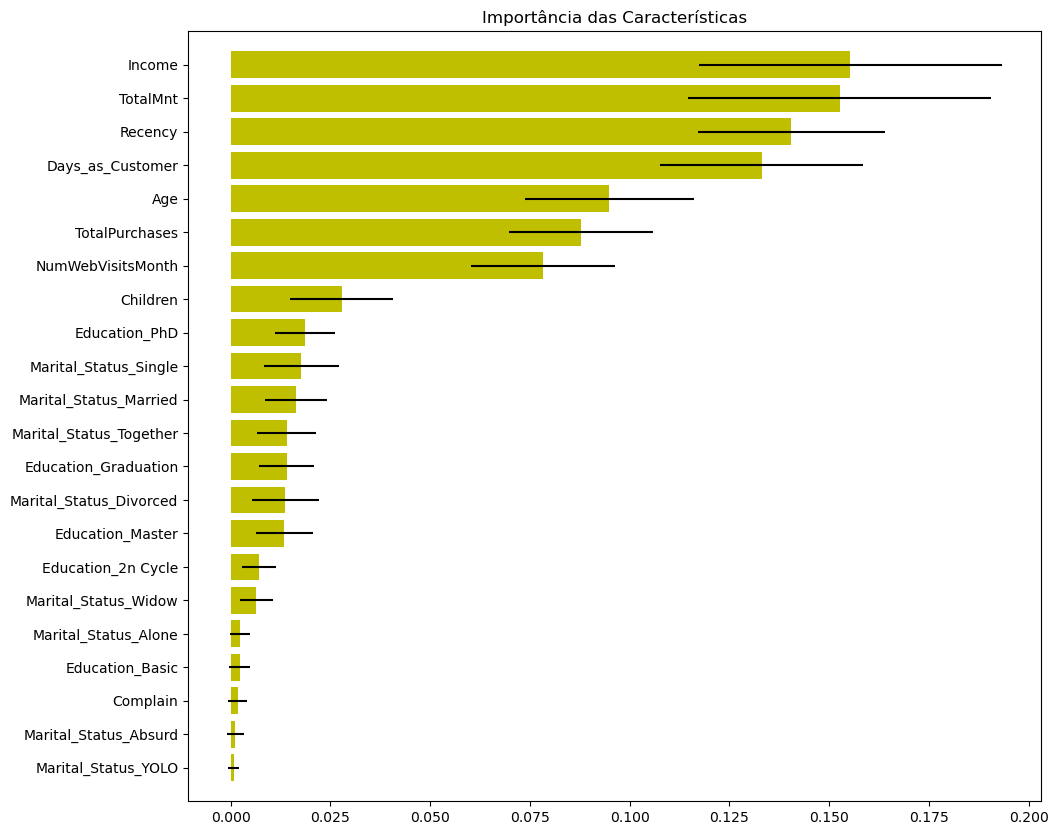

In [53]:
# Plot
plt.figure(1, figsize = (11, 10))
plt.title("Importância das Características")
plt.barh(range(X.shape[1]), importances[indices], color = "y", xerr = std[indices], align = "center")
plt.yticks(range(X.shape[1]), X.columns[indices])
plt.ylim([-1, X.shape[1]])
plt.show()

In [60]:
colunas = {0:"Importances", 1:"Variables"}

In [79]:
df_importances = pd.DataFrame([importances[indices], X.columns[indices]]).T.sort_values(0, ascending = False).reset_index()
df_importances = df_importances.drop('index', axis = 1)
df_importances = df_importances.rename(columns = colunas)
df_importances

,Importances,Variables
0,0.155297,Income
1,0.152621,TotalMnt
2,0.140503,Recency
3,0.133063,Days_as_Customer
4,0.094859,Age
5,0.087842,TotalPurchases
6,0.078306,NumWebVisitsMonth
7,0.027807,Children
8,0.018619,Education_PhD
9,0.01775,Marital_Status_Single


In [84]:
# Apresentação da variáveis mais influentes
print('As variáveis abaixo são as mais impactantes para a aceitação das campanhas e juntas correspondem a {:.2f} % dos fatores de influência das campanhas:'.format(df_importances.Importances[:7,].sum()*100))
df_importances.loc[:7,]

As variáveis abaixo são as mais impactantes para a aceitação das campanhas e juntas correspondem a 84.25 % dos fatores de influência das campanhas:


,Importances,Variables
0,0.155297,Income
1,0.152621,TotalMnt
2,0.140503,Recency
3,0.133063,Days_as_Customer
4,0.094859,Age
5,0.087842,TotalPurchases
6,0.078306,NumWebVisitsMonth
7,0.027807,Children


## Testes de Hipóteses

O nível educacional e a configuração familiar dos clientes parecem não ser relevantes para explicar a aceitação das campanhas de marketing. No entanto, pode haver uma relação entre esses fatores e o nível de renda e o total gasto, respectivamente, que são variáveis bastante relevantes.

Para verificar essa relação, será testado se existe diferença significativa entre a média de renda entre clientes com e sem nível superior, e entre a média de gastos totais entre clientes com e sem família constituída. 

### Renda e Nível Educacional

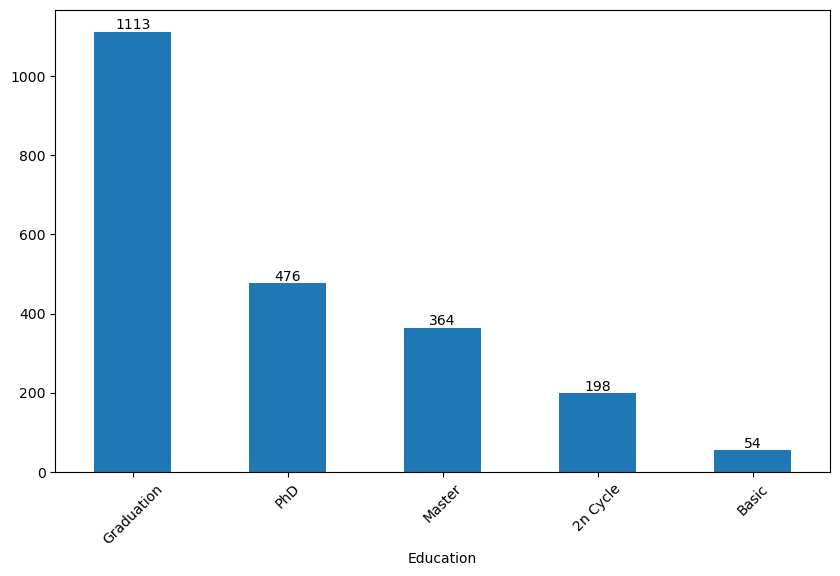

In [85]:
# Plot do total de clientes por nível educacional
plt.figure(figsize = (10, 6))
ax = df.Education.value_counts().plot.bar()
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
ax.bar_label(ax.containers[0])
plt.show;

In [86]:
# Calcula a média
media_renda = df.groupby('Education')['Income'].mean().reset_index()
media_renda = media_renda.sort_values(by = 'Income')

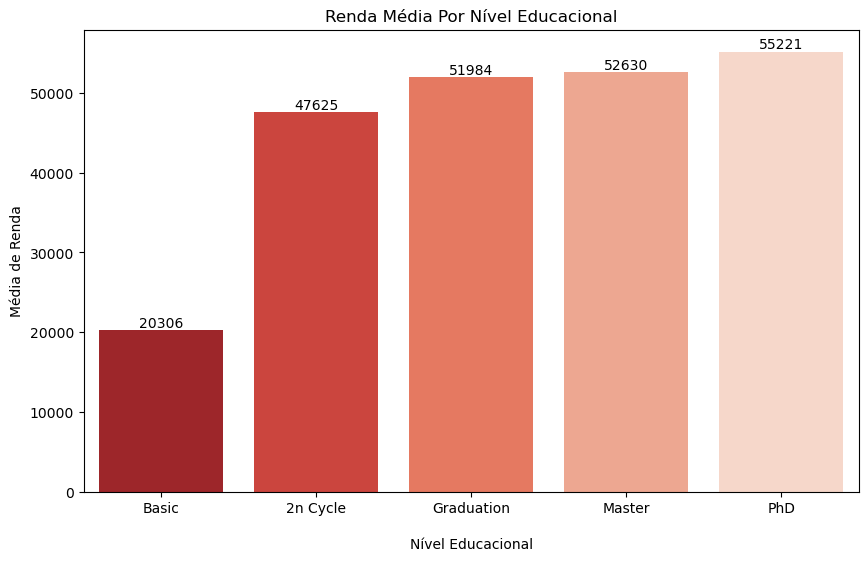

In [87]:
# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x = media_renda['Education'], y = media_renda['Income'], data = df, palette = 'Reds_r')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha = 'center', 
                va = 'bottom')
plt.xlabel('\nNível Educacional')
plt.ylabel('Média de Renda')
plt.title('Renda Média Por Nível Educacional')
plt.show()

Não há muita diferença de renda entre aqueles que possuem nível superior.

### Definição das hipóteses

In [88]:
# Representação numérica da variável categórica
df['Education'] = df['Education'].map({'Basic':1,
                                             '2n Cycle':2,
                                             'Graduation':3,
                                             'Master':4,
                                             'PhD':5})

# Dados que serão testados
dados_teste_1 = df[['Income', 'Education']]

dados_teste_1.head()

,Income,Education
0,84835.0,3
1,57091.0,3
2,67267.0,3
3,32474.0,3
4,21474.0,3


#### Teste Paramétrico de normalidade

In [89]:
# Teste Shapiro-Wilk 
def df_teste_normal(dados,columns):
    
    for column in columns:
        
        statistic, p_value = shapiro(dados[column])

        alpha = 0.05
        
        if p_value < alpha:
             print(f'\n{column}: Alpha {alpha} < valor-p {p_value:.2f} - Rejeitamos a H0 do Teste Shapiro-Wilk: Os dados não são normalmente distribuídos.')
        else:
             print(f'\n{column}: Alpha {alpha} > valor-p {p_value:.2f} - Falhamos em Rejeitar a H0 do Teste Shapiro-Wilk: Os dados seguem uma distribuição normal.')

In [90]:
df_teste_normal(dados_teste_1,dados_teste_1)


Income: Alpha 0.05 < valor-p 0.00 - Rejeitamos a H0 do Teste Shapiro-Wilk: Os dados não são normalmente distribuídos.

Education: Alpha 0.05 < valor-p 0.00 - Rejeitamos a H0 do Teste Shapiro-Wilk: Os dados não são normalmente distribuídos.


### Teste Não Paramétrico de Hipótese

In [91]:
# Criando os grupos
grupo_com_graduacao = df[df['Education'].isin([5, 4, 3])]['Income']
grupo_sem_graduacao = df[df['Education'].isin([1, 2])]['Income']

In [92]:
# Teste Mann-Whitney U 
statistic, p_value = mannwhitneyu(grupo_com_graduacao, grupo_sem_graduacao)

# Nível de significância
alpha = 0.05

# Resultado
if p_value < alpha:
    print("Rejeitamos a hipótese nula: Há uma diferença significativa nas médias de renda.")
else:
    print("Falhamos em rejeitar a hipótese nula: Não há diferença significativa nas médias de renda.")

Rejeitamos a hipótese nula: Há uma diferença significativa nas médias de renda.


### Total Gasto e Família

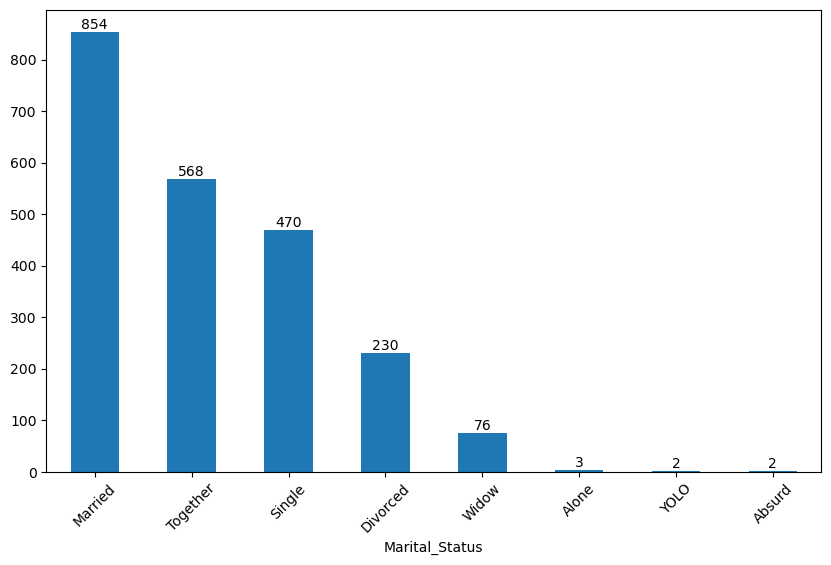

In [93]:
# Plot do total de clientes por nível educacional
plt.figure(figsize = (10, 6))
ax = df.Marital_Status.value_counts().plot.bar()
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
ax.bar_label(ax.containers[0])
plt.show;

In [94]:
# Calcula a média
familia_gastos = df.groupby('Marital_Status')['TotalMnt'].mean().reset_index()
familia_gastos = familia_gastos.sort_values(by = 'TotalMnt')

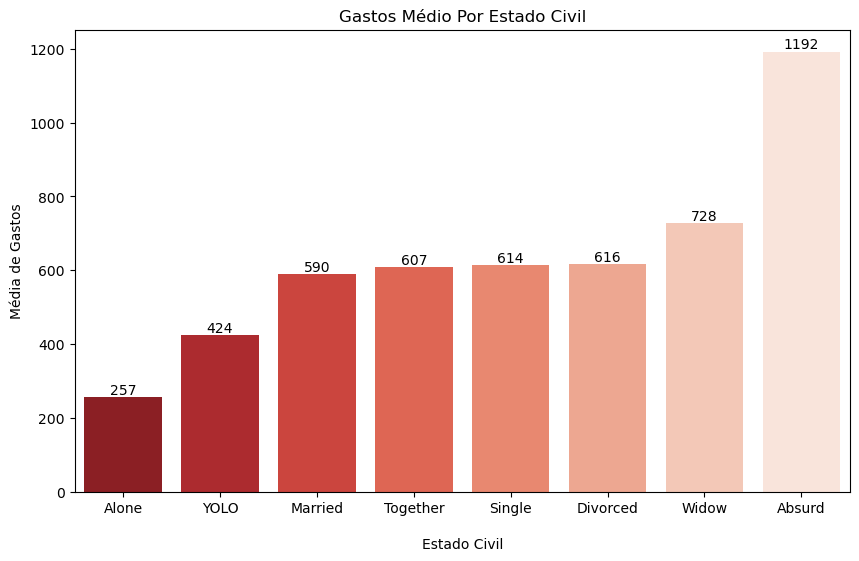

In [95]:
# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x = familia_gastos['Marital_Status'], y = familia_gastos['TotalMnt'], data = df, palette = 'Reds_r')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha = 'center', 
                va = 'bottom')
plt.xlabel('\nEstado Civil')
plt.ylabel('Média de Gastos')
plt.title('Gastos Médio Por Estado Civil')
plt.show()

### Definindo as hipóteses

In [96]:
# Representação numérica da variável categórica
df['Marital_Status'] = df['Marital_Status'].map({'Alone':1,
                                             'YOLO':2,
                                             'Married':3,
                                             'Together':4,
                                             'Single':5,
                                                'Divorced':6,
                                                'Widow':7,
                                                'Absurd':8})

# Dados que serão testados
dados_teste_2 = df[['TotalMnt', 'Marital_Status']]

dados_teste_2.head()

,TotalMnt,Marital_Status
0,1190,6
1,577,5
2,251,3
3,11,4
4,91,5


#### Teste Paramétrico de Normalidade

In [97]:
df_teste_normal(dados_teste_2,dados_teste_2)


TotalMnt: Alpha 0.05 < valor-p 0.00 - Rejeitamos a H0 do Teste Shapiro-Wilk: Os dados não são normalmente distribuídos.

Marital_Status: Alpha 0.05 < valor-p 0.00 - Rejeitamos a H0 do Teste Shapiro-Wilk: Os dados não são normalmente distribuídos.


#### Teste Não Paramétrico de Hipótese

In [98]:
# Criando os grupos
grupo_sem_parceiro = df[df['Marital_Status'].isin([1, 2, 5, 6, 7, 8])]['TotalMnt']
grupo_com_parceiro = df[df['Marital_Status'].isin([3, 4])]['TotalMnt']

In [100]:
# Teste Mann-Whitney U 
statistic, p_value = mannwhitneyu(grupo_sem_parceiro, grupo_com_parceiro)

# Nível de significância
alpha = 0.05

# Resultado
if p_value < alpha:
    print("Rejeitamos a hipótese nula: Há uma diferença significativa nas médias de gastos.")
else:
    print("Falhamos em rejeitar a hipótese nula: Não há diferença significativa nas médias de gastos.")

Falhamos em rejeitar a hipótese nula: Não há diferença significativa nas médias de gastos.


## Conclusão

Os fatores que mais influenciam a aceitação das campanhas de marketing são Renda, Gastos Totais, Tempo desde a última compra e Dias com Cliente. Ou seja, clientes fiéis são mais propensos a aceitar as campanhas de marketing.

Além disso, clientes mais velhos, com filhos e que visitam o site da loja também tem maior probabilidade de aceitar as campanhas.

Pelos testes estatísticos, a existência de um parceiro não afeta a média dos gastos totais dos clientes, mas ter uma educação superior afeta significativamente a média de renda dos clientes. Como foi visto, clientes com educação superior tem maior média de renda.

Assim, as campanhas deveriam ser segmentadas para os diferentes públicos e direcionar as campanhas com base na renda e no nível educacional, considerando ainda histórico de gasto total, o tempo como cliente, filhos, idade, total de compras anteriores e acesso dos clientes ao site da loja.